In [1]:
import NNMFit
import matplotlib.pyplot as plt

In [2]:
import matplotlib.font_manager as font_manager
font_axis_label = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 22,
        }
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
font_legend = font_manager.FontProperties(family='serif',
                                   weight='normal',
                                   style='normal', size=13)

plt.rcParams["figure.figsize"] = (6,6)
plt.rcParams.update({'font.family':'serif'})

In [3]:
scan_dir_dict = {
                 "track_Poisson" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/Poisson/track",
                #  "cscd_Poisson" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/Poisson/cscd",
                 "track_cscd_nohybrid_Poisson" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/Poisson/track_cscd_nohybrid",
                 "track_cscd_Poisson" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/Poisson/track_cscd",

                 "track_SAY" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track",
                #  "cscd_SAY" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/cscd",
                 "track_cscd_nohybrid_SAY" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track_cscd_nohybrid",
                 "track_cscd_SAY" : "/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/create_dag/output/SAY/track_cscd",
                 }

In [4]:
drop_unsuccessful = True

scan_dict = {}

x = {}
y = {}
dllh = {}

for name, scan_dir in scan_dir_dict.items():
    print(name)
    # use force_read if new scan points are produced
    scan_dict[name] = NNMFit.utilities.ScanHandler(scan_dir,dump=False,drop_unsuccessful=drop_unsuccessful)
    x[name], y[name], dllh[name] = scan_dict[name].get_scan_xydllh(x="astro_norm",y="gamma_astro",interpolate=True, drop_unsuccessful=drop_unsuccessful)

track_Poisson
track_cscd_nohybrid_Poisson
track_cscd_Poisson
track_SAY
track_cscd_nohybrid_SAY
track_cscd_SAY


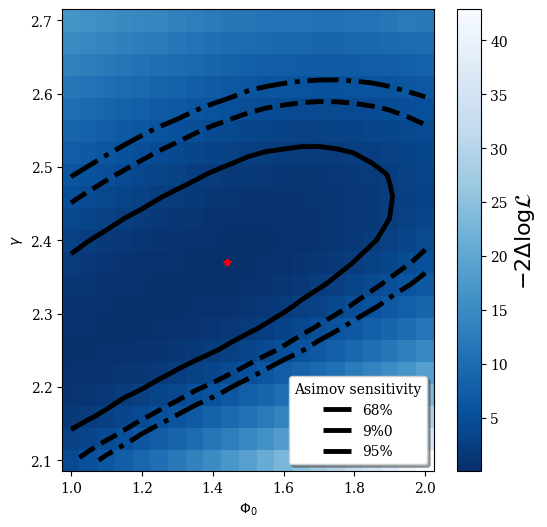

In [5]:
name = "track_Poisson"

levels = [2.3,4.6,5.99]  # 50% 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%", "9%0","95%"]

colors = ["black", "red"]
linestyles = ["-","--", "-."]

fig, (ax) = plt.subplots(1, 1)

cntr = ax.contour( x[name], y[name], dllh[name], 
                  levels=levels, colors=colors[0], linewidths=3.5, linestyles = linestyles )

pcm = ax.pcolor(x[name], 
                y[name], 
                dllh[name],
                cmap='Blues_r', shading='auto')

cbar = fig.colorbar(pcm, ax=ax)
cbar.set_label(label=r'$-2\Delta\mathrm{log}\mathcal{L}$',size=16,fontfamily='serif')


ax.plot([1.44], [2.37],"*", color="red")

ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")

# set the legend
ll, lh = [], []
h, _ = cntr.legend_elements()
for i in range(len(h)):
    lh.append(h[i]) # legend elements
    ll.append(f'{levlabels[i]}') # legend text

l3 = ax.legend(lh,ll,loc = "lower right", title = "Asimov sensitivity",
                ncols=1,frameon=True,fancybox=True,shadow=True)

# plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/combined_track_shower/plots/llscan_contour_{name}.pdf")

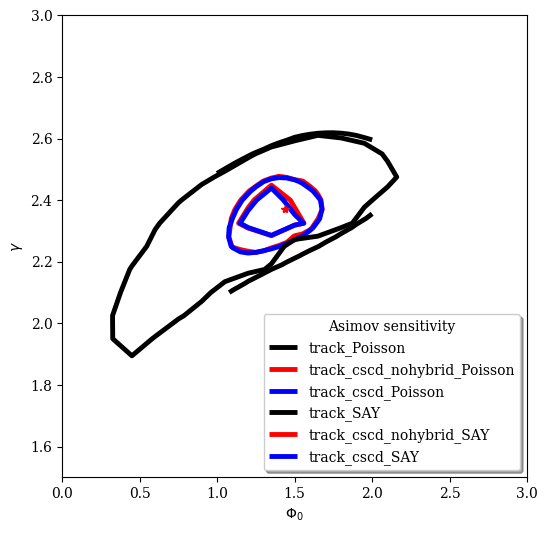

In [10]:
# levels = [2.3,5.99]  # 50% 1sigma (68%), 5.99 2sigma (95%)
# levlabels = ["68%", "95%"]

levels = [5.99]  # 50% 1sigma (68%), 5.99 2sigma (95%)
levlabels = ["68%"]


colors = ["black", "red", "blue", "black", "red", "blue"]
linestyles = ["-","--"]

fig, (ax) = plt.subplots(1, 1)

ll, lh = [], []

for index, key in enumerate(scan_dict):

    cntr = ax.contour( x[key], y[key], dllh[key], 
                    levels=levels, colors=colors[index], linewidths=3.5, linestyles = linestyles )

    # set the legend
    h, _ = cntr.legend_elements()
    for i in range(len(h)):
        lh.append(h[i]) # legend elements
        ll.append(f'{key}') # legend text

ax.plot([1.44], [2.37],"*", color="red")

ax.set_xlabel(r"$\Phi_0$")
ax.set_ylabel(r"$\gamma$")



l3 = ax.legend(lh,ll,loc = "lower right", title = "Asimov sensitivity",
                ncols=1,frameon=True,fancybox=True,shadow=True)

plt.savefig(f"/data/user/tvaneede/GlobalFit/analysis/toy_km3net/plots/llscan_contour_{name}.pdf")